### 1) The heatmap analysis of x_train in the exploratory nootbook indicated maximum correlations for "LDL" and "Cholestrol" features. As a result, one of the "LDL" was dropped from the dataset


### 2) We improved the dataframe's performance by introducing new derived features:'Average Eyesight'. These were calculated based on existing features.

### 3) We performed feature selection based on variance.This process helps in reducing the dimensionality of the data by discarding low-variance features, which might not contribute significantly to the analysis or modeling process.

### 4) Boxplots revealed outliers in certain features, prompting the need to cap extreme values. This process aims to limit outliers' impact by adjusting them closer to predefined thresholds

### 5) Normalized the dataset using MinMaxScaler(), StandardScaler(), and RobustScaler() methods. This process aimed to narrow the numerical range, enhancing the model's performance by standardizing the data.

In [2]:
# Import necessary libraries
import math
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import itertools
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pip install scikit-optimize scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv(r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\output_Data.csv')


In [4]:
df.head()

,Unnamed: 0,id,AST,Cholesterol,LDL,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein,smoking
0,0,0,22,172,75,0.6,40,300,0.5,165,1,1
1,1,1,27,194,126,0.7,57,55,0.6,165,1,0
2,2,2,27,178,93,0.5,45,197,0.4,170,1,1
3,3,3,20,180,102,1.2,38,203,1.5,180,1,0
4,4,4,19,155,93,1.0,44,87,1.5,165,1,1


## 1) Dropping "id" & "AST" 

In [5]:
df.drop(columns=['id', 'LDL','Unnamed: 0'], inplace=True)

## 2) introducing new derived feature

In [6]:
# Calculate Average Eyesight
df['Average Eyesight'] = (df['eyesight(right)'] + df['eyesight(left)']) / 2


In [7]:
df.head()

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein,smoking,Average Eyesight
0,22,172,0.6,40,300,0.5,165,1,1,0.55
1,27,194,0.7,57,55,0.6,165,1,0,0.65
2,27,178,0.5,45,197,0.4,170,1,1,0.45
3,20,180,1.2,38,203,1.5,180,1,0,1.35
4,19,155,1.0,44,87,1.5,165,1,1,1.25


## Splitting the dataset into x (features) and y (target column)

In [8]:
y=df['smoking']

In [9]:
x=df.drop(columns=['smoking'])

In [10]:
x

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein,Average Eyesight
0,22,172,0.6,40,300,0.5,165,1,0.55
1,27,194,0.7,57,55,0.6,165,1,0.65
2,27,178,0.5,45,197,0.4,170,1,0.45
3,20,180,1.2,38,203,1.5,180,1,1.35
4,19,155,1.0,44,87,1.5,165,1,1.25
...,...,...,...,...,...,...,...,...,...
159251,25,238,2.0,72,47,1.5,155,1,1.75
159252,21,213,1.0,64,202,1.0,155,1,1.00
159253,15,189,1.0,87,45,1.5,160,1,1.25
159254,22,165,1.0,55,148,1.2,165,1,1.10


## 3) Vaiance Threshold for removing features with low variance (feature selection)

In [11]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Specify a threshold for variance
threshold = 0.115
selector = VarianceThreshold(threshold)
x_selected = selector.fit_transform(x)

# Create a DataFrame using the selected features
x_selected_df = pd.DataFrame(x_selected)

# Optionally, if you want to retain column names
# Assuming the original column names are relevant
x_selected_df.columns = x.columns[selector.get_support()]


x_selected_df.head()


,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein
0,22.0,172.0,0.6,40.0,300.0,0.5,165.0,1.0
1,27.0,194.0,0.7,57.0,55.0,0.6,165.0,1.0
2,27.0,178.0,0.5,45.0,197.0,0.4,170.0,1.0
3,20.0,180.0,1.2,38.0,203.0,1.5,180.0,1.0
4,19.0,155.0,1.0,44.0,87.0,1.5,165.0,1.0


In [12]:
x=x_selected_df
x

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein
0,22.0,172.0,0.6,40.0,300.0,0.5,165.0,1.0
1,27.0,194.0,0.7,57.0,55.0,0.6,165.0,1.0
2,27.0,178.0,0.5,45.0,197.0,0.4,170.0,1.0
3,20.0,180.0,1.2,38.0,203.0,1.5,180.0,1.0
4,19.0,155.0,1.0,44.0,87.0,1.5,165.0,1.0
...,...,...,...,...,...,...,...,...
159251,25.0,238.0,2.0,72.0,47.0,1.5,155.0,1.0
159252,21.0,213.0,1.0,64.0,202.0,1.0,155.0,1.0
159253,15.0,189.0,1.0,87.0,45.0,1.5,160.0,1.0
159254,22.0,165.0,1.0,55.0,148.0,1.2,165.0,1.0


## spliiting the data into train , test and valdation

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)


## 4) Beginning at this point, our focus shifted to handling outliers within the dataset.

## Capping Outliers

In [14]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[ (x_train['eyesight(right)'] > 2)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples above 2:", outlier_count)


Number of samples above 2: 79


In [15]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[(x_train['eyesight(left)'] > 2)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples above 2:", outlier_count)


Number of samples above 2: 90


In [16]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[ (x_train['Urine protein'] > 4)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples above 4:", outlier_count)


Number of samples above 4: 56


In [17]:
upper_bound = 2  # Define the upper bound

# Cap outliers for 'eyesight(right)' column
x_train['eyesight(right)'] = x_train['eyesight(right)'].clip(upper=upper_bound)

# Cap outliers for 'eyesight(left)' column
x_train['eyesight(left)'] = x_train['eyesight(left)'].clip(upper=upper_bound)


In [18]:
upper_bound = 4  # Define the upper bound

# Cap outliers for 'eyesight(right)' column
x_train['Urine protein'] = x_train['Urine protein'].clip(upper=upper_bound)


In [19]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[(x_train['eyesight(left)'] > 2)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples above 2:", outlier_count)


Number of samples above 2: 0


In [20]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[(x_train['eyesight(right)'] > 2)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples above 2:", outlier_count)


Number of samples above 2: 0


In [21]:
# Find indexes where 'eyesight(right)' is below 10 and above 4
outlier_indexes = x_train[(x_train['Urine protein'] > 4)].index

# Count occurrences
outlier_count = len(outlier_indexes)

# Print the results
print("Number of samples between above 4:", outlier_count)


Number of samples between above 4: 0


##  Identifying outliers using the 1.5 * IQR (Inter Quantile Range) rule, caps them at the nearest boundary, and prints the count of outlier samples found in each feature.

In [22]:
features_to_check = ['Cholesterol','HDL','triglyceride','height(cm)']

for column_name in features_to_check:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = x_train[column_name].quantile(0.25)
    Q3 = x_train[column_name].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine the outlier samples
    outliers = x_train[(x_train[column_name] < lower_bound) | (x_train[column_name] > upper_bound)]

    # Print or inspect the outliers for each feature
    print(f"Outlier Samples in {column_name}:",len(outliers))

    x_train.loc[x_train[column_name] < lower_bound, column_name] = lower_bound
    x_train.loc[x_train[column_name] > upper_bound, column_name] = upper_bound


Outlier Samples in Cholesterol: 308
Outlier Samples in HDL: 1346
Outlier Samples in triglyceride: 2159
Outlier Samples in height(cm): 316


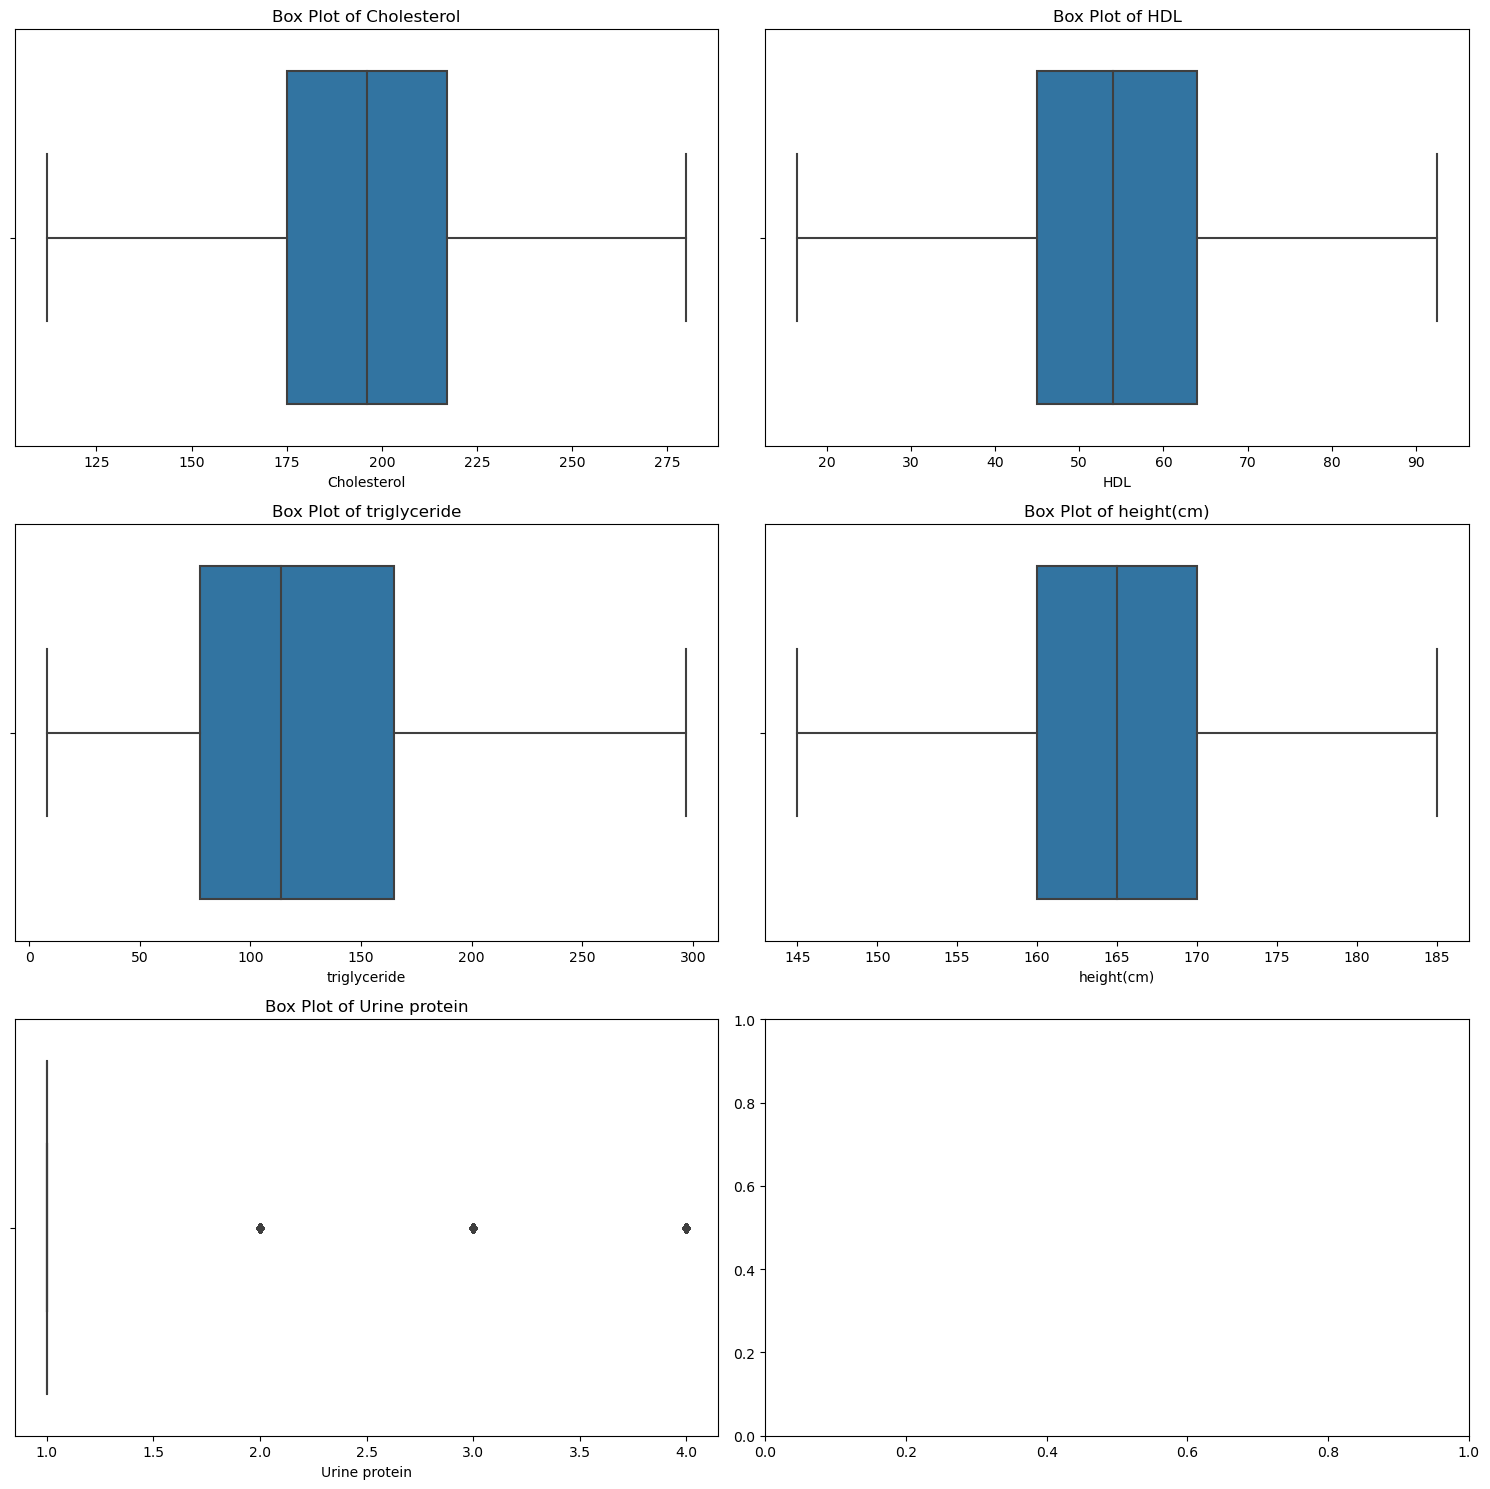

In [25]:

features_to_check = ['Cholesterol','HDL','triglyceride','height(cm)','Urine protein']

# Assuming df is your DataFrame
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(features_to_check):
    row_num = i // num_cols
    col_num = i % num_cols

    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=x_train[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [26]:
x_test.head()

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein
5959,13.0,195.0,1.2,90.0,68.0,1.2,150.0,1.0
6025,37.0,204.0,1.5,46.0,242.0,1.5,165.0,1.0
80935,25.0,172.0,1.0,53.0,229.0,1.2,150.0,1.0
118806,19.0,195.0,1.0,52.0,160.0,0.8,165.0,1.0
95346,36.0,232.0,1.5,58.0,179.0,1.5,160.0,1.0


## 5) Normalizing the dataset

## 5.1 MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

col = ['Cholesterol', 'eyesight(right)']
scaler = MinMaxScaler()

# Assuming x_train, x_test, x_val are DataFrames

for column in col:
    # Reshape the data to work with fit_transform
    x_train[column] = scaler.fit_transform(x_train[column].values.reshape(-1, 1))
    x_test[column] = scaler.transform(x_test[column].values.reshape(-1, 1))
    x_val[column] = scaler.transform(x_val[column].values.reshape(-1, 1))

# Print the transformed columns in x_train (optional)
print(x_train[col])


        Cholesterol  eyesight(right)
17406      0.357143         0.368421
61303      0.553571         0.578947
71781      0.440476         0.315789
67014      0.327381         0.473684
73322      0.351190         0.473684
...             ...              ...
119879     0.672619         0.578947
103694     0.339286         0.578947
131932     0.321429         0.473684
146867     0.375000         0.736842
121958     1.000000         0.473684

[111479 rows x 2 columns]


## 5.2 StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

col = ['HDL', 'triglyceride', 'eyesight(left)', 'height(cm)']
scaler = StandardScaler()

for column in col:
    # Reshape the data to work with fit_transform
    x_train[column] = scaler.fit_transform(x_train[column].values.reshape(-1, 1))
    x_test[column] = scaler.transform(x_test[column].values.reshape(-1, 1))
    x_val[column] = scaler.transform(x_val[column].values.reshape(-1, 1))


print(x_train[col])


             HDL  triglyceride  eyesight(left)  height(cm)
17406  -1.076028      0.990459        0.000746   -0.031118
61303   1.543598     -1.062704        0.000746   -0.599977
71781   0.452087      0.285174       -0.320325   -0.599977
67014   0.379319     -1.062704       -0.320325   -1.168836
73322  -0.712191     -0.263381       -0.962466   -1.168836
...          ...           ...             ...         ...
119879 -1.003261      1.209881        0.642887    1.675459
103694 -0.566657      0.457577        1.606099   -0.031118
131932  1.325296     -0.529822        0.000746   -0.599977
146867 -1.003261     -0.639533        0.642887    0.537741
121958 -0.348354      0.896421        0.642887    1.106600

[111479 rows x 4 columns]


## 5.3 RobustScaler

In [29]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

col = ['Urine protein']
scaler = RobustScaler()

# Assuming x_train is your DataFrame

for column in col:    
    # Reshape the data to work with fit_transform
    x_train[column] = scaler.fit_transform(x_train[column].values.reshape(-1, 1))
    x_test[column] = scaler.transform(x_test[column].values.reshape(-1, 1))
    x_val[column] = scaler.transform(x_val[column].values.reshape(-1, 1))


print(x_train[col])


        Urine protein
17406             0.0
61303             0.0
71781             0.0
67014             0.0
73322             0.0
...               ...
119879            0.0
103694            0.0
131932            0.0
146867            0.0
121958            0.0

[111479 rows x 1 columns]


In [30]:
x_test

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein
5959,13.0,0.494048,0.578947,2.489574,-0.921647,0.642887,-1.737695,0.0
6025,37.0,0.547619,0.736842,-0.712191,1.805455,1.606099,-0.031118,0.0
80935,25.0,0.357143,0.473684,-0.202820,1.601706,0.642887,-1.737695,0.0
118806,19.0,0.494048,0.473684,-0.275587,0.520269,-0.641395,-0.031118,0.0
95346,36.0,0.714286,0.736842,0.161017,0.818056,1.606099,-0.599977,0.0
...,...,...,...,...,...,...,...,...
82336,23.0,0.273810,0.736842,0.015482,0.128444,1.606099,1.106600,0.0
1450,19.0,0.458333,0.473684,-0.202820,0.457577,1.606099,0.537741,0.0
110125,45.0,0.482143,0.421053,0.233785,-0.247708,-0.962466,-0.031118,0.0
6730,18.0,0.636905,0.578947,0.161017,1.680071,0.642887,-0.031118,0.0


## concatenating x and y 

In [31]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
val = pd.concat([x_val, y_val], axis=1)

In [32]:
train.head()

,AST,Cholesterol,eyesight(right),HDL,triglyceride,eyesight(left),height(cm),Urine protein,smoking
17406,24.0,0.357143,0.368421,-1.076028,0.990459,0.000746,-0.031118,0.0,1
61303,34.0,0.553571,0.578947,1.543598,-1.062704,0.000746,-0.599977,0.0,1
71781,17.0,0.440476,0.315789,0.452087,0.285174,-0.320325,-0.599977,0.0,1
67014,38.0,0.327381,0.473684,0.379319,-1.062704,-0.320325,-1.168836,0.0,0
73322,25.0,0.351190,0.473684,-0.712191,-0.263381,-0.962466,-1.168836,0.0,0


## Converting the datasets into csv files

In [33]:
train.to_csv(r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\train_Data.csv') 
test.to_csv(r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\test_Data.csv') 
val.to_csv(r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\val_Data.csv') 